<a href="https://colab.research.google.com/github/gfeyzakorkmaz/Tries/blob/main/Pandas3.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [2]:
import pandas as pd

path = '/content/drive/MyDrive/Dataset/complex_marketing_data_enriched.xlsx'

df = pd.read_excel(path)

In [3]:
top_campaigns = df.groupby('Campaign')['Converted'].mean().nlargest(3)
print(top_campaigns)


Campaign
Winter Sale     0.777778
Summer Sale     0.500000
Black Friday    0.000000
Name: Converted, dtype: float64


In [4]:
gender_income_spending = df.groupby(['Income Level', 'Gender'])['Total Spent'].mean().unstack()
print(gender_income_spending)


Gender                 F           M
Income Level                        
High          510.000000  456.666667
Low           560.000000  336.666667
Medium        421.428571  466.666667


In [5]:
correlation_discount_return = df[['Discount Availed', 'Return Rate (%)']].corr()
print(correlation_discount_return)


                  Discount Availed  Return Rate (%)
Discount Availed          1.000000        -0.201527
Return Rate (%)          -0.201527         1.000000


In [6]:
from collections import Counter
comment_keywords = Counter(" ".join(df['Comments'].dropna()).split())
print(comment_keywords.most_common(10))


[('with', 4), ('the', 4), ('Satisfied', 3), ('customer', 3), ('service', 2), ('Needs', 2), ('High', 2), ('product', 2), ('Enjoys', 2), ('improvement', 1)]


In [7]:
retention_rate = df[df['Customer Tenure (Years)'] > 5].shape[0] / df.shape[0]
print(f"Retention Rate: {retention_rate:.2%}")


Retention Rate: 60.00%


In [8]:
region_cart_value = df.groupby('Region')['Average Cart Value'].mean()
print(region_cart_value)


Region
East     261.086667
North    252.950000
South    237.930000
West     303.413333
Name: Average Cart Value, dtype: float64


In [10]:
df['Negative Comment'] = df['Comments'].str.contains('improvement|bad|poor', case=False, na=False)
dissatisfaction_category = df[df['Negative Comment']].groupby('Purchased Category').size().idxmax()
print(dissatisfaction_category)


Beauty


based on negative comments - the lowest satisfaction

In [11]:
pivot_spent = df.pivot_table(values='Total Spent', index='Gender', columns='Income Level', aggfunc='sum')
print(pivot_spent)


Income Level  High   Low  Medium
Gender                          
F              510  1680    2950
M             1370  1010    1400


In [12]:
weighted_return_rate = df.groupby('Region').apply(lambda x: (x['Return Rate (%)'] * x['Total Spent']).sum() / x['Total Spent'].sum())
print(weighted_return_rate)


Region
East     4.842837
North    5.270617
South    6.775497
West     3.558502
dtype: float64


<ipython-input-12-94e6a1d277b1>:1: DeprecationWarning: DataFrameGroupBy.apply operated on the grouping columns. This behavior is deprecated, and in a future version of pandas the grouping columns will be excluded from the operation. Either pass `include_groups=False` to exclude the groupings or explicitly select the grouping columns after groupby to silence this warning.
  weighted_return_rate = df.groupby('Region').apply(lambda x: (x['Return Rate (%)'] * x['Total Spent']).sum() / x['Total Spent'].sum())


In [13]:
high_value_customers = df[(df['Total Spent'] > df['Total Spent'].mean()) &
                          (df['Customer Tenure (Years)'] > df['Customer Tenure (Years)'].mean())]
print(high_value_customers)


   Customer ID  Age Gender  Total Spent  Converted  \
1            2   35      M          600          1   
2            3   45      F          800          0   
5            6   41      M          450          0   
6            7   38      F          670          1   
8            9   50      F          500          0   

                        Comments Purchased Category  Stock Region  \
1  Needs improvement in delivery             Beauty     86   West   
2               Regular customer              Books     24  North   
5             Average experience              Books     86   West   
6        Prefers online shopping         Home Goods     69  North   
8             Loyal to the brand        Electronics     86   East   

  Income Level  Discount Availed  Customer Tenure (Years)      Campaign  \
1          Low                61                       12   Summer Sale   
2       Medium                50                       12  Black Friday   
5       Medium                 2   

In [15]:
highest_discount_category = df.groupby('Purchased Category')['Discount Availed'].mean().idxmax()
print(highest_discount_category)


Clothing


the highest discount

<ipython-input-17-f9143c66ded3>:4: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  age_spending = df.groupby(age_bins)['Total Spent'].mean()


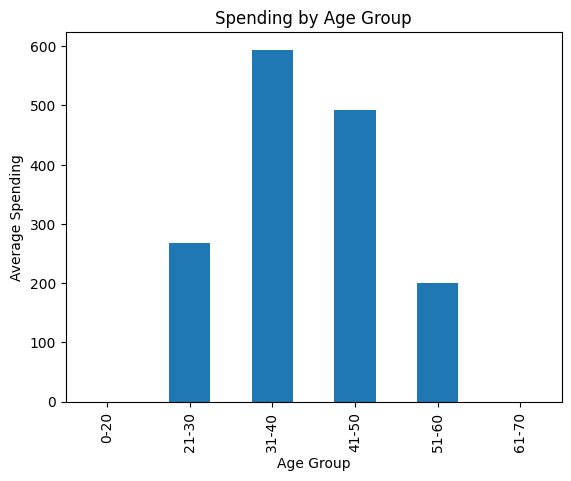

In [17]:
import matplotlib.pyplot as plt

age_bins = pd.cut(df['Age'], bins=[0, 20, 30, 40, 50, 60, 70], labels=['0-20', '21-30', '31-40', '41-50', '51-60', '61-70'])
age_spending = df.groupby(age_bins)['Total Spent'].mean()
age_spending.plot(kind='bar', title='Spending by Age Group', xlabel='Age Group', ylabel='Average Spending')
plt.show()


In [18]:
conversion_by_visits = df.groupby('Website Visit Frequency')['Converted'].mean()
print(conversion_by_visits)


Website Visit Frequency
0    0.00
1    0.50
2    1.00
3    0.40
4    0.75
5    0.50
6    1.00
7    1.00
Name: Converted, dtype: float64


In [19]:
return_by_gender = df.groupby('Gender')['Return Rate (%)'].mean()
print(return_by_gender)


Gender
F    4.482236
M    4.742430
Name: Return Rate (%), dtype: float64


In [20]:
visits_by_income = df.groupby('Income Level')['Website Visit Frequency'].mean()
print(visits_by_income)


Income Level
High      3.0
Low       3.5
Medium    2.9
Name: Website Visit Frequency, dtype: float64


In [22]:
multi_category_customers = df.groupby('Customer ID')['Purchased Category'].nunique()
customers_in_multiple_categories = multi_category_customers[multi_category_customers > 1]
print(customers_in_multiple_categories)


Series([], Name: Purchased Category, dtype: int64)


In [23]:
region_tenure = df.groupby('Region')['Customer Tenure (Years)'].mean().sort_values(ascending=False)
print(region_tenure)


Region
North    9.250000
West     8.166667
East     6.555556
South    1.000000
Name: Customer Tenure (Years), dtype: float64


In [24]:
cart_return_correlation = df[['Average Cart Value', 'Return Rate (%)']].corr()
print(cart_return_correlation)


                    Average Cart Value  Return Rate (%)
Average Cart Value            1.000000        -0.352785
Return Rate (%)              -0.352785         1.000000


In [25]:
age_group_conversion = df.groupby(age_bins)['Converted'].mean()
print(age_group_conversion)


Age
0-20          NaN
21-30    0.833333
31-40    0.857143
41-50    0.166667
51-60    0.000000
61-70         NaN
Name: Converted, dtype: float64


<ipython-input-25-608d5ed17a35>:1: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  age_group_conversion = df.groupby(age_bins)['Converted'].mean()


In [26]:
discount_per_campaign = df.groupby('Campaign')['Discount Availed'].mean()
print(discount_per_campaign)


Campaign
Black Friday    40.750000
Summer Sale     56.500000
Winter Sale     32.333333
Name: Discount Availed, dtype: float64
